Contact Binary with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)

Model without Spots
--------------------------

In [2]:
b.add_dataset('lc', times=phoebe.linspace(0,0.5,101))

<ParameterSet: 20 parameters | contexts: dataset, compute, constraint>

In [3]:
b.run_compute(irrad_method='none', model='no_spot')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Adding Spots
---------------------

Let's add a spot to the primary component in our binary.  Note that if you attempt to attach to the 'contact_envelope' component, an error will be raised.  Spots can only be attached to *star* components.

For more details, see the [spots tutorial](../tutorials/spots.ipynb)

In [4]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=20, colat=90, long=-45)

Wed, 19 Jun 2019 09:29 PARAMETERS   WARNING wrapping value of long to 315.0 deg


<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

In [5]:
b.run_compute(irrad_method='none', model='with_spot')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Comparing Light Curves
------------------------------

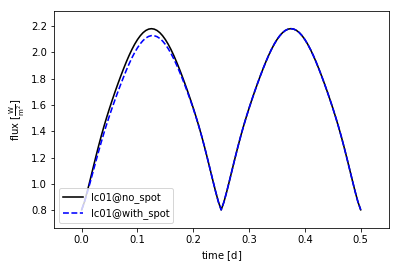

In [6]:
afig, mplfig = b.plot(show=True, legend=True)

## Spots near the "neck"

Since the spots are still defined with the coordinate system of the individual star components, this can result in spots that are distorted and even "cropped" at the neck.  Furthermore, spots with `long=0` could be completely "hidden" by the neck or result in a ring around the neck.

To see this, let's plot our mesh with `teff` as the facecolor.

In [7]:
b.remove_dataset(kind='lc')

In [8]:
b.remove_model(model=['with_spot', 'no_spot'])

In [9]:
b.add_dataset('mesh', compute_times=b.to_time(0.25), columns='teffs')

<ParameterSet: 7 parameters | contexts: dataset, compute, constraint>

In [10]:
b.run_compute(irrad_method='none')

<ParameterSet: 12 parameters | components: primary, secondary>

Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


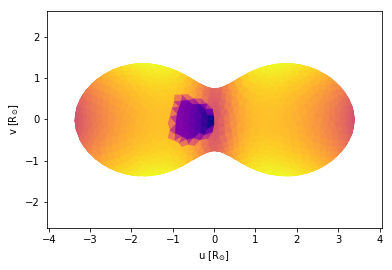

In [11]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

Now if we set the `long` closer to the neck, we'll see it get cropped by the boundary between the two components.  If we need a spot that crosses between the two "halves" of the contact, we'd have to add separate spots to each component, with each getting cropped at the boundary.

In [12]:
b.set_value('long', value=-30)

Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING wrapping value of long to 330.0 deg


In [13]:
b.run_compute(irrad_method='none')

Wed, 19 Jun 2019 09:30 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 12 parameters | components: primary, secondary>

Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


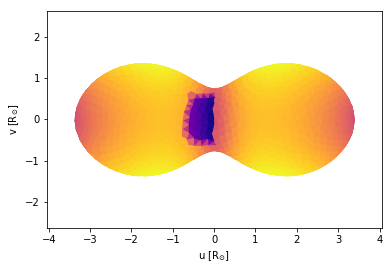

In [14]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

If we set `long` to zero, the spot completely disappears (as there is nowhere in the neck that is still on the surface.

In [15]:
b.set_value('long', value=0.0)

In [16]:
b.run_compute(irrad_method='none')

Wed, 19 Jun 2019 09:30 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 12 parameters | components: primary, secondary>

Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


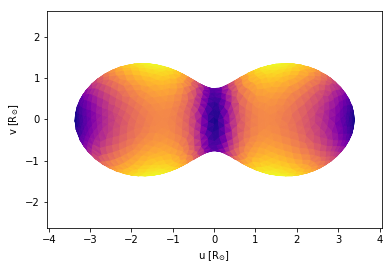

In [17]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

But if we increase the `radius` large enough, we'll get a ring.

In [18]:
b.set_value('radius', value=40)

In [19]:
b.run_compute(irrad_method='none')

Wed, 19 Jun 2019 09:30 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 12 parameters | components: primary, secondary>

Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Wed, 19 Jun 2019 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


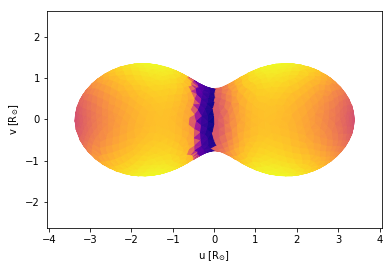

In [20]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)